In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# read the file
demo_df=pd.read_excel('Demo_Refined_withUserID.xlsx')

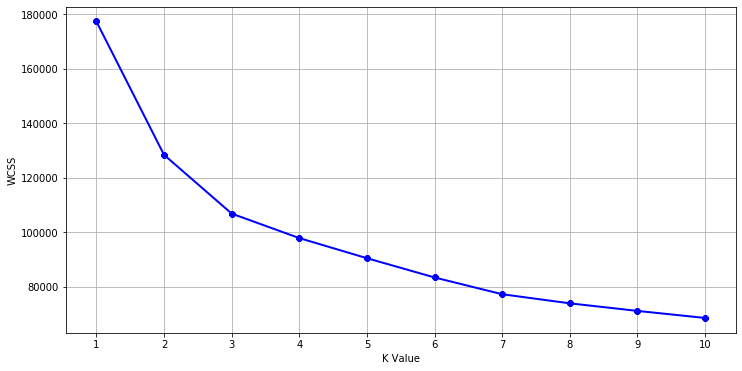

In [6]:
#Elbow Method
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(demo_df[['Region', 'Size of manucipality','Household size', 'GenderID','Occupation','Gross income (year)','Social Class', 'Education','Status ', '# children in household','age_category']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [7]:
#when k=6, application of k means 
km=KMeans(n_clusters=6)
cluster=km.fit_predict(demo_df[['Region', 'Size of manucipality','Household size', 'GenderID','Occupation','Gross income (year)','Social Class', 'Education','Status ', '# children in household','age_category']])
demo_df["cluster"]=cluster

In [8]:
# caclualte cluster means- describtion of the clusters 
demo_df_means=demo_df.groupby(['cluster']).mean()

In [9]:
#export cluster means results 
demo_df_means.to_excel('kmeans_description.xlsx')

In [10]:
#export k means clustering results 
demo_df.to_excel('Demo_KMeans_6.xlsx')